In [1]:
%matplotlib inline

In [2]:
import os
import sys

from ggplot import *

pyrnafold_path = os.path.abspath(os.path.join('..'))
if pyrnafold_path not in sys.path:
    sys.path.append(pyrnafold_path)
    
from pyrnafold.pyrnafold import trange_df, sig_positions

In [3]:
ls -lah ../data

total 1.6M
drwxrwxr-x 2 ilya ilya 4.0K Apr 18 13:26 ./
drwxrwxr-x 8 ilya ilya 4.0K Apr 18 12:55 ../
-rw-rw-r-- 1 ilya ilya 112K Apr 18 13:26 hHSR_35.txt
-rw-rw-r-- 1 ilya ilya 115K Apr 18 13:26 hHSR_36.txt
-rw-rw-r-- 1 ilya ilya 118K Apr 18 13:26 hHSR_37.txt
-rw-rw-r-- 1 ilya ilya 121K Apr 18 13:26 hHSR_38.txt
-rw-rw-r-- 1 ilya ilya 123K Apr 18 13:26 hHSR_39.txt
-rw-rw-r-- 1 ilya ilya 127K Apr 18 13:26 hHSR_40.txt
-rw-rw-r-- 1 ilya ilya 132K Apr 18 13:26 hHSR_41.txt
-rw-rw-r-- 1 ilya ilya 136K Apr 18 13:26 hHSR_42.txt
-rw-rw-r-- 1 ilya ilya 140K Apr 18 13:26 hHSR_43.txt
-rw-rw-r-- 1 ilya ilya 145K Apr 18 13:26 hHSR_44.txt
-rw-rw-r-- 1 ilya ilya 150K Apr 18 13:26 hHSR_45.txt
-rw-rw-r-- 1 ilya ilya  611 Apr 18 12:45 hHSR.fa
-rw-rw-r-- 1 ilya ilya 7.1K Apr 18 13:13 ROSE1_37.txt
-rw-rw-r-- 1 ilya ilya 7.8K Apr 18 13:13 ROSE1_38.txt
-rw-rw-r-- 1 ilya ilya 8.1K Apr 18 13:13 ROSE1_39.txt
-rw-rw-r-- 1 ilya ilya 8.2K Apr 18 13:13 ROSE1_40.txt
-rw-rw-r-- 1 ilya ilya 8.6K Apr 18 13:13 ROSE1_41.tx

## Build a dataframe

`trange_df` parses `.txt` files containing base pairing probabilities for a given `trange` and builds a `DataFrame` that contains probability difference for each `T` relative to the lowest `T` in `trange`.

In [4]:
df = trange_df('../data/hHSR', trange=range(35, 45))
df

,pos,Diff,Temp
0,0,0.000000,36
1,1,0.002137,36
2,2,0.002143,36
3,3,0.001084,36
4,4,0.001551,36
5,5,0.002297,36
6,6,0.002091,36
7,7,0.001138,36
8,8,0.002524,36
9,9,0.004284,36


In [5]:
df.describe()

,pos,Diff,Temp
count,5445.000000,5445.000000,5445.000000
mean,302.000000,0.030726,40.000000
std,174.664258,0.042001,2.582226
min,0.000000,0.000000,36.000000
25%,151.000000,0.003713,38.000000
50%,302.000000,0.013258,40.000000
75%,453.000000,0.038685,42.000000
max,604.000000,0.254724,44.000000


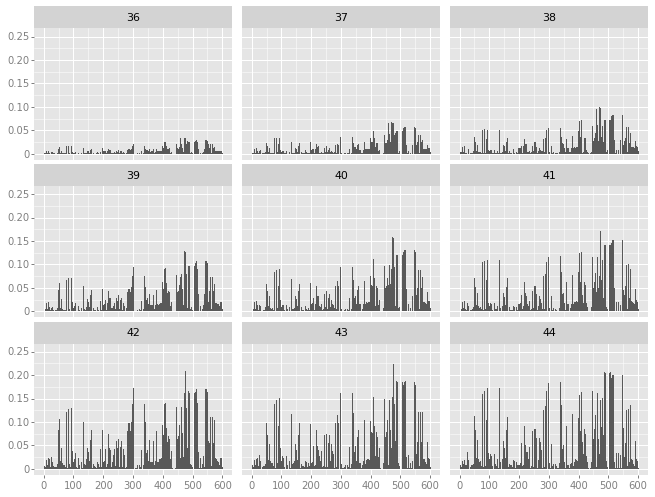

<ggplot: (-9223363292714695957)>


In [6]:
g = ggplot(df, aes(xmin='pos-1',xmax='pos', ymin=0, ymax='Diff')) \
    + geom_rect() \
    + facet_wrap('Temp')
print(g)

In [10]:
df[sig_positions(df, num_sigma=3)]

,pos,Diff,Temp
474,474,0.157715,40
475,475,0.157546,40
476,476,0.157095,40
474,474,0.170586,41
475,475,0.184866,41
476,476,0.184355,41
477,477,0.183233,41
297,297,0.157668,42
302,302,0.172771,42
337,337,0.172771,42
